In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, MWETokenizer
# nltk.download('punkt')

In [2]:
data_url = 'C:/Users/admin/Python_analysis/Streamlit/Data_analysts_skills_in_Vietnam/data6.csv'
jobs_all = pd.read_csv(data_url).replace("'","", regex=True)
jobs_all.date_time = pd.to_datetime(jobs_all.date_time) # convert to date time
jobs_all= jobs_all.drop(labels=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','Unnamed: 0.3','Unnamed: 0.4',
                                'Unnamed: 0.5','Unnamed: 0.6','Unnamed: 0.7','Unnamed: 0.8', 'index'], axis=1, errors='ignore')

# Picked out keywords based on all keywords (only looked words with 100+ occurrences)
keywords_programming = [
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql', 
]

keywords_libraries = [
'scikit-learn', 'jupyter', 'theano', 'openCV', 'spark', 'nltk', 'mlpack', 'chainer', 'fann', 'shogun', 
'dlib', 'mxnet', 'node.js', 'vue', 'vue.js', 'keras', 'ember.js', 'jse/jee',
]

keywords_analyst_tools = [
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot',
]

keywords_cloud_tools = [
'aws', 'azure', 'gcp', 'snowflake', 'redshift', 'bigquery', 'aurora',
]

# Not using
keywords_general_tools = [
'microsoft', 'slack', 'apache', 'ibm', 'html5', 'datadog', 'bloomberg',  'ajax', 'persicope', 'oracle', 
]

# Not using
keywords_general = [
'coding', 'server', 'database', 'cloud', 'warehousing', 'scrum', 'devops', 'programming', 'saas', 'ci/cd', 'cicd', 
'ml', 'data_lake', 'frontend',' front-end', 'back-end', 'backend', 'json', 'xml', 'ios', 'kanban', 'nlp',
'iot', 'codebase', 'agile/scrum', 'agile', 'ai/ml', 'ai', 'paas', 'machine_learning', 'macros', 'iaas',
'fullstack', 'dataops', 'scrum/agile', 'ssas', 'mlops', 'debug', 'etl', 'a/b', 'slack', 'erp', 'oop', 
'object-oriented', 'etl/elt', 'elt', 'dashboarding', 'big-data', 'twilio', 'ui/ux', 'ux/ui', 'vlookup', 
'crossover',  'data_lake', 'data_lakes', 'bi', 
]

keywords = keywords_programming + keywords_libraries + keywords_analyst_tools + keywords_cloud_tools 

jobs_all = jobs_all[jobs_all.description.notnull()] # filter out null values
jobs_all = jobs_all.reset_index() # throwing index issues if don't reset index
# jobs_all = jobs_all.head(10) 

jobs_all['description_tokens'] = ""



In [3]:
for index, row in jobs_all.iterrows():
    # lowercase words
    detail = row.description.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # handle multi-word tokenization (e.g., 'Power BI')
    multi_tokens = [('power', 'bi'), ('data', 'lake'), ('data', 'lakes'), ('machine', 'learning'), ('objective', 'c'),
                    ('visual', 'basic')]
    tokenizer = MWETokenizer(multi_tokens)
    detail = tokenizer.tokenize(detail)
    # remove duplicates
    detail = list(set(detail))
    # filter for keywords only
    detail = [word for word in detail if word in keywords] 
    # replace duplicate keywords
    replace_tokens = {'powerbi' : 'power_bi', 'spreadsheets': 'spreadsheet'}
    for key, value in replace_tokens.items():
        detail = [d.replace(key, value) for d in detail]
    # add to details list # row.description_tokens = detail
    jobs_all.at[index, 'description_tokens'] = detail
    jobs_all = pd.DataFrame(jobs_all)
    jobs_all.to_csv('C:/Users/admin/Python_analysis/Streamlit/Data_analysts_skills_in_Vietnam/modules/test2.csv')
    


In [32]:
def filtered_keywords(jobs_filtered, keywords, title="Keyword Analysis", head=10):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.description_tokens.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plt.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plt.xlabel("")
    plt.ylabel("Likelyhood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    print(count_keywords)

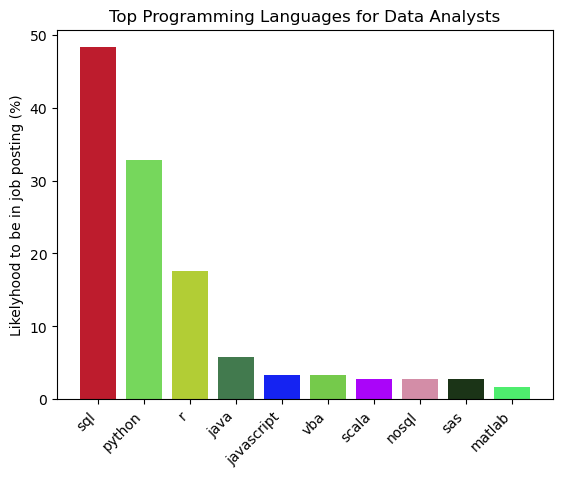

      keywords  counts  percentage
0          sql     143   48.310811
2       python      97   32.770270
5            r      52   17.567568
6         java      17    5.743243
12  javascript      10    3.378378
14         vba      10    3.378378
16       scala       8    2.702703
17       nosql       8    2.702703
19         sas       8    2.702703
29      matlab       5    1.689189


In [33]:
filtered_keywords(jobs_all, keywords_programming, title="Top Programming Languages for Data Analysts")

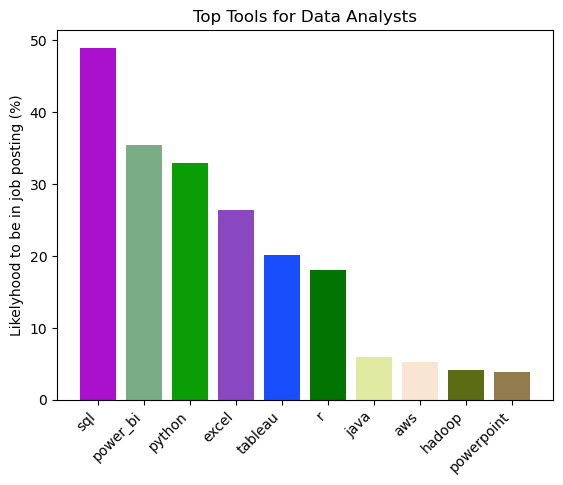

     keywords  counts  percentage
0         sql     141   48.958333
1    power_bi     102   35.416667
2      python      95   32.986111
3       excel      76   26.388889
4     tableau      58   20.138889
5           r      52   18.055556
6        java      17    5.902778
7         aws      15    5.208333
8      hadoop      12    4.166667
9  powerpoint      11    3.819444


In [8]:
filtered_keywords(jobs_all, keywords, title="Top Tools for Data Analysts")

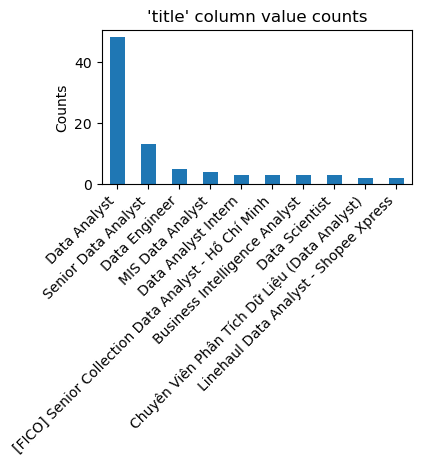

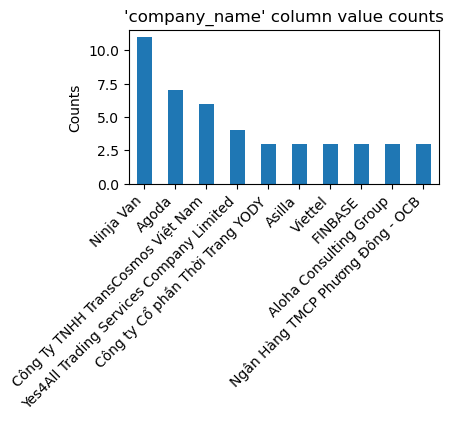

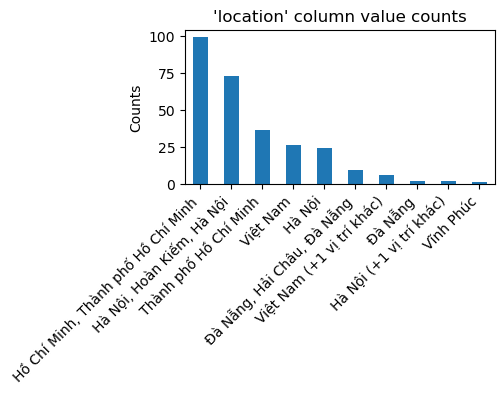

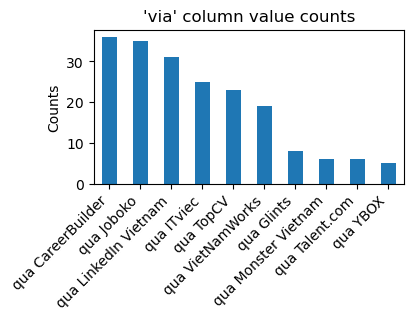

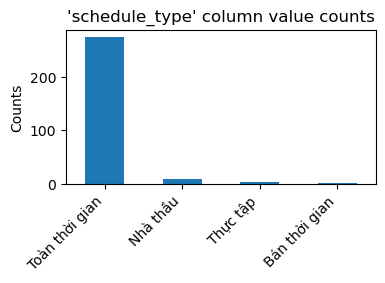

In [77]:
def eda_plot(column, topn=10):
    plt.figure(figsize=(4, 2))
    jobs_all[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 45, ha='right')
    plt.show()

columns = ['title', 'company_name', 'location', 'via', 'schedule_type']

for column in columns:
    eda_plot(column)

In [24]:
jobs_all

,index,title,company_name,location,via,description,related_links,thumbnail,extensions,job_id,posted_at,schedule_type,date_time,search_term,search_location,commute_time,description_tokens
0,0,Data Analyst,Công ty Cổ phần Thời Trang YODY,Việt Nam,qua CareerBuilder,"- Xây dựng các data models, pipelines trên Cơ ...",[{link: https://www.google.com.vn/search?ucbcb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[6 ngày trước, 20\xa0Tr\xa0₫–35\xa0Tr\xa0₫ một...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,6 ngày trước,Toàn thời gian,2023-02-13 16:53:22.608629,data analyst,Vietnam,NaN,"[python, javascript, sql]"
1,1,Data Analyst,Công ty cổ phần Nal Solutions,Việt Nam,qua Việc Làm Sinh Viên,"• Thiết kế, xây dựng, quản lý và bảo mật dữ li...",[{link: https://www.google.com.vn/search?ucbcb...,NaN,"[5 ngày trước, Toàn thời gian]",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,5 ngày trước,Toàn thời gian,2023-02-13 16:53:22.608629,data analyst,Vietnam,NaN,[]
2,2,Data Analyst - Up to $1200,Unimob,Việt Nam,qua 5Job.VN,"• Khai thác, xử lý dữ liệu và thống kê hành vi...",[{link: https://www.google.com.vn/search?ucbcb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,[Toàn thời gian],eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBVcCB0by...,NaN,Toàn thời gian,2023-02-13 16:53:22.608629,data analyst,Vietnam,NaN,"[bigquery, sql]"
3,3,Data Analyst,Công ty Tài chính TNHH MB SHINSEI (MCREDIT),Việt Nam,qua CareerBuilder,• Thu thập và chuẩn hóa dữ liệu gian lận & dữ ...,[{link: https://www.google.com.vn/search?ucbcb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[14 ngày trước, Toàn thời gian]",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,14 ngày trước,Toàn thời gian,2023-02-13 16:53:22.608629,data analyst,Vietnam,NaN,[]
4,4,Senior Data Analyst,EPAM Systems,Việt Nam,qua The Muse,If you have a solid background in Data Analyti...,"[{link: http://www.epam.com/, text: epam.com},...",https://encrypted-tbn0.gstatic.com/images?q=tb...,[Toàn thời gian],eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0Ii...,NaN,Toàn thời gian,2023-02-13 16:53:22.608629,data analyst,Vietnam,NaN,"[go, dax, power_bi, sql]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,Real-Time Analyst,"Gear Inc,","Đà Nẵng, Hải Châu, Đà Nẵng","qua SÀN VIỆC LÀM ĐÀ NẴNG, THÔNG TIN VIỆC LÀM T...",* Mô tả công việc:\nWorking Location ● Hai Ba ...,[{link: https://www.google.com.vn/search?gl=vn...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[10 ngày trước, Toàn thời gian]",eyJqb2JfdGl0bGUiOiJSZWFsLVRpbWUgQW5hbHlzdCIsIm...,10 ngày trước,Toàn thời gian,2023-02-13 16:54:19.740927,data analyst,"Da Nang, Da Nang, Vietnam",NaN,[excel]
284,284,Data Engineer,CÔNG TY TNHH TRANSFORMHUB,"Đà Nẵng, Hải Châu, Đà Nẵng",qua Việc Làm Sinh Viên,"• Design, Develop and maintain data pipelines ...",[{link: https://www.google.com.vn/search?gl=vn...,NaN,"[11 ngày trước, Toàn thời gian]",eyJqb2JfdGl0bGUiOiJEYXRhIEVuZ2luZWVyIiwiaHRpZG...,11 ngày trước,Toàn thời gian,2023-02-13 16:54:19.909610,data analyst,"Da Nang, Da Nang, Vietnam",NaN,[]
285,285,Real-Time Analyst,CÔNG TY TNHH GEAR INC VIỆT NAM,Đà Nẵng,"qua SÀN VIỆC LÀM ĐÀ NẴNG, THÔNG TIN VIỆC LÀM T...",* Mô tả công việc:\nGear Inc is seeking Real-T...,[{link: https://www.google.com.vn/search?gl=vn...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[25 ngày trước, Toàn thời gian]",eyJqb2JfdGl0bGUiOiJSZWFsLVRpbWUgQW5hbHlzdCIsIm...,25 ngày trước,Toàn thời gian,2023-02-13 16:54:19.909610,data analyst,"Da Nang, Da Nang, Vietnam",NaN,[excel]
286,286,Trưởng Phòng Phân Tích Dữ Liệu (Data Analyst),Công ty CP Ô tô Trường Hải (THACO) tại Chu Lai,Quảng Nam,qua Joboko,Mô tả công việc\nCung cấp báo cáo và phân tích...,"[{link: http://www.thacogroup.vn/, text: thaco...",https://encrypted-tbn0.gstatic.com/images?q=tb...,"[11 ngày trước, Toàn thời gian]",eyJqb2JfdGl0bGUiOiJUcsaw4bufbmcgUGjDsm5nIFBow6...,11 ngày trước,Toàn thời gian,2023-02-13 16:54:19.909610,data analyst,"Da Nang, Da Nang, Vietnam",NaN,"[spss, r, sas, excel, sql]"